# VERIFICA LEGGE DI MALUS:

$I(\alpha) = I_0\cos^2(\alpha)$

In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import sys

dir_path = os.path.abspath('')
sys.path.append(dir_path + '/../')

from interpolazione import Interpolazione, final_val

dir_path = os.path.abspath('')
FILE = dir_path + '/data/' + 'malus.csv'
fr = pd.read_csv(FILE)

In [8]:
# import dati da csv

α = np.array(fr['alpha (deg)']) * np.pi / 180 # rad
V = np.array(fr['V (Volt)']) # Volt
# I = np.array(fr['I (mA)'])[0:11] # Ampere
# sigmaI = np.array(fr['sigmaI'])[0:11] # Ampere
sigmaV = np.array(fr['sigmaV']) # Volt

Abbiamo due modelli possibili:
- Il nostro sensore misura l'intensità del fascio $I$
- Il nostro sensore misura l'ampiezza del campo elettrico $E$

Sappiamo che il fascio si tratta di microonde polarizzate linearmente

cerchiamo inoltre l'angolo in cui la polarizzazione è massima variando l'angolo del ricevitore

In [9]:
def legge_malus(α,I0,offset):
    return I0 * np.cos(α + offset)**2

def campo_polarizzato(α,E0,offset):
    return E0 * np.abs(np.cos(α + offset))

malus_E = Interpolazione(α, V, campo_polarizzato, sigmaV,[0,0],names=['E0','offset'])
# malus_I = Interpolazione(α, I, campo_polarizzato, sigmaI,[0,0],names=['I0','offset'])

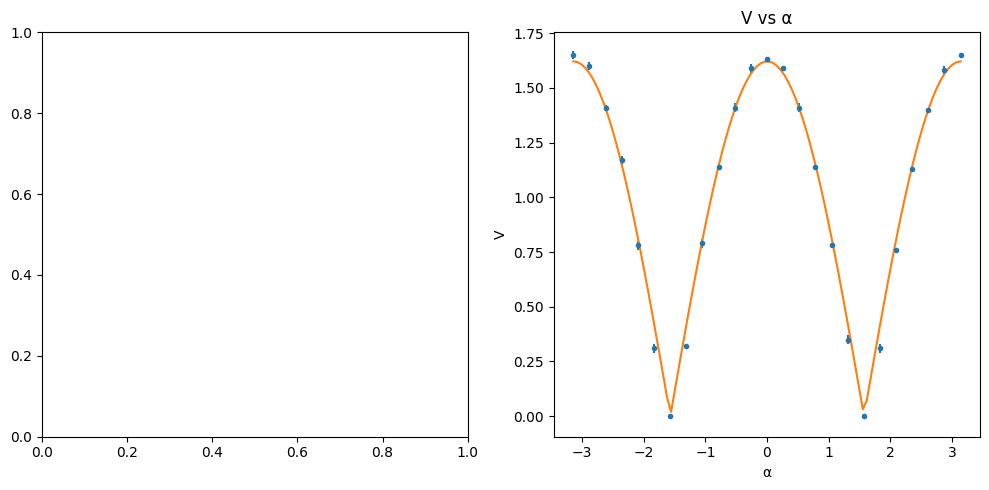

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot for I
# axs[0].errorbar(α, I, yerr=sigmaI, fmt='.', label='data')
# axs[0].plot(malus_I.x_best, malus_I.y_best, label='fit')
# axs[0].set_xlabel('α')
# axs[0].set_ylabel('I')
# axs[0].set_title('I vs α')

# Plot for V
axs[1].errorbar(α, V, yerr=sigmaV, fmt='.', label='data')
axs[1].plot(malus_E.x_best, malus_E.y_best, label='fit')
axs[1].set_xlabel('α')
axs[1].set_ylabel('V')
axs[1].set_title('V vs α')

plt.tight_layout()
plt.show()



le andature di tensione e di corrente seguono la legge $|\cos(x)|$, i nostri rilevatori leggono quindi l'ampiezza del campo elettrico

In [11]:
print(malus_I)
print(malus_E)

NameError: name 'malus_I' is not defined

# TODO: PROVARE A RACCOGLIERE MISURE FINO A 180° PER VERIFICARE CHE SIA IL  MODULO DEL COSENO